# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\MiniProjects\\human_temp\\data\\human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature,130.0,98.249231,0.733183,96.3,97.8,98.3,98.7,100.8
heart_rate,130.0,73.761538,7.062077,57.0,69.0,74.0,79.0,89.0


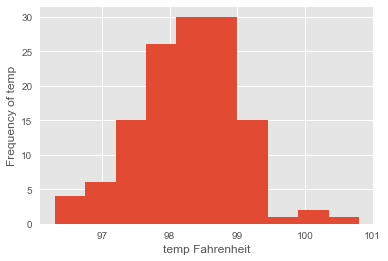

In [20]:
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
%matplotlib inline
temp = df['temperature']
heartr = df['heart_rate']
temp.plot(kind = 'hist', bins = 10)
temp = plt.xlabel ('temp Fahrenheit')
temp = plt.ylabel ('Frequency of temp')
plt.show()

# Is the distribution of body temperatures normal?
## The answer is it look like normally distributed. But with running normal CDF, it confirms its normallity.
## The sample size is 130 (small size). 

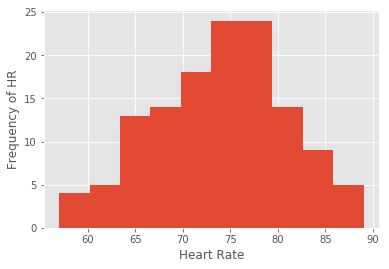

In [6]:
heartr.plot (kind='hist', bins=10)
heartr = plt.xlabel ('Heart Rate')
heartr = plt.ylabel ('Frequency of HR')
plt.show()

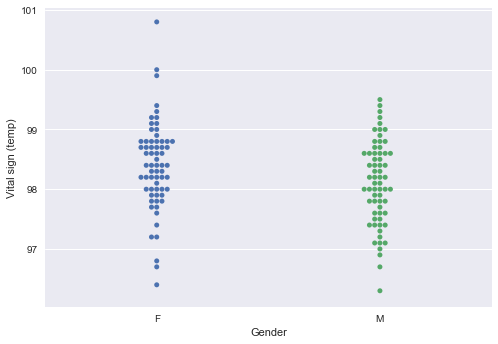

In [7]:
import seaborn as sns
sns.set()

_ = sns.swarmplot (x= 'gender', y= 'temperature' , data = df)
_ = plt.xlabel ('Gender')
_ = plt.ylabel ('Vital sign (temp)')
plt.show ()

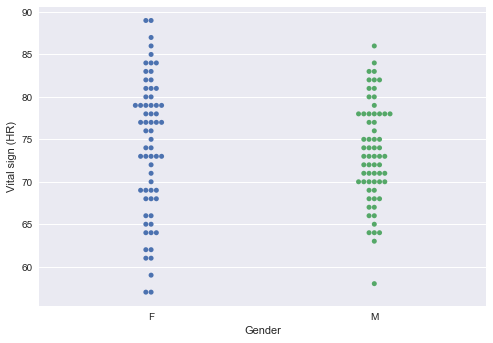

In [8]:
_ = sns.swarmplot (x = 'gender', y = 'heart_rate', data = df)
_ = plt.xlabel ('Gender')
_ = plt.ylabel ('Vital sign (HR)')
plt.show ()

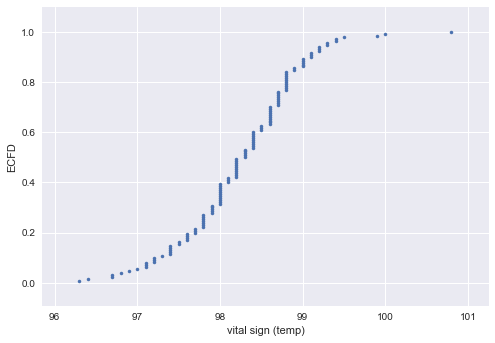

In [9]:
import numpy as np
x = np.sort (df['temperature'])
y = np.arange (1, len(x)+1) / len(x)
_ = plt.plot (x, y, marker= ".", linestyle = "none")
_ = plt.xlabel ('vital sign (temp)')
_ = plt.ylabel ('ECFD')
plt.margins (0.1)
plt.show ()

In [10]:
def ecdf (data):
    n = len (data)
    x = np.sort (data)
    y = np.arange (1, n+1)/n
    return x, y

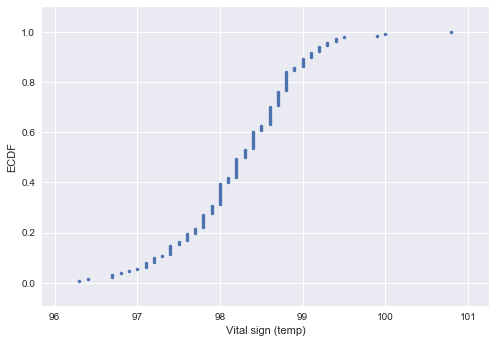

In [11]:
x_temp, y_temp = ecdf (df['temperature'])
_ = plt.plot (x_temp, y_temp, marker = '.', linestyle ='none')
_ = plt.xlabel ('Vital sign (temp)')
_= plt.ylabel ('ECDF')
plt.margins (0.1)
plt.show ()

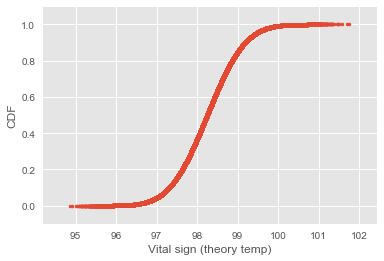

In [27]:
mean = np.mean (df['temperature'])
std = np.std (df['temperature'])
samples = np.random.normal (mean, std, size=1000000)
x_theory, y_theory = ecdf (samples)
_ = plt.plot (x_theory, y_theory, marker = '.', linestyle = 'none')
_ = plt.xlabel ('Vital sign (theory temp)')
_ = plt.ylabel ('CDF')
plt.margins (0.1)
plt.show ()

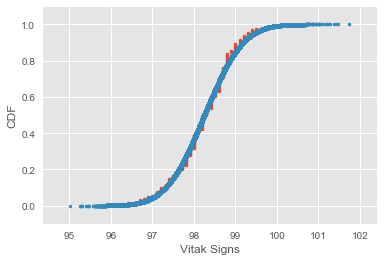

In [26]:
x_temp, y_temp = ecdf (df ['temperature'])
x_theory, y_theory = ecdf (samples)
_ = plt.plot (x_temp, y_temp, marker = ".", linestyle = "none")
_ = plt.plot (x_theory, y_theory, marker = ".", linestyle = "none")
_ = plt.xlabel ('Vitak Signs')
_ = plt.ylabel ('CDF')
plt.margins (0.1)
plt.show ()

#The CDF confirms its normallity.

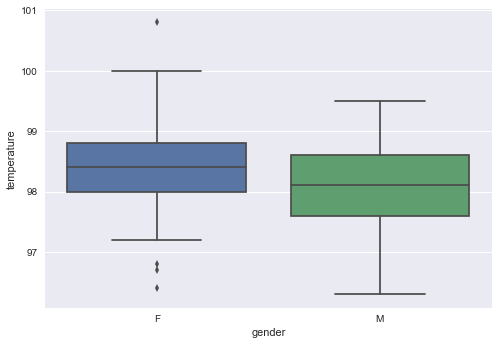

In [14]:
_ = sns.boxplot (x= 'gender', y = 'temperature', data = df)

In [38]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [39]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.0640566146952
0.063410184666


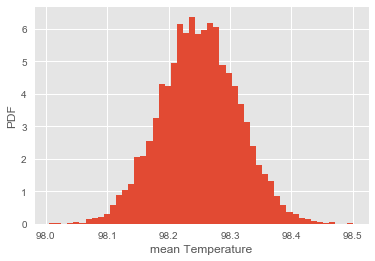

In [41]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean Temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [ 98.12538462  98.37461538] temperature


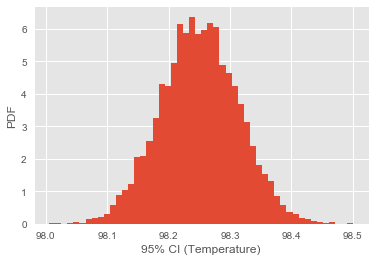

In [43]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('95% CI (Temperature)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Is the true population mean really 98.6 degrees F?
No

At what temperature should we consider someone's temperature to be "abnormal"?
Normal temperature is between 98.12-98.37.

In [71]:
male = df['gender'] == 'M'
male = df[male]
male = male ['temperature']
female = df['gender'] == 'F'
female = df[female]
female = female ['temperature']

In [72]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

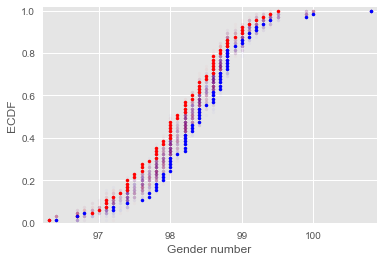

In [76]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(male, female)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(male)
x_2, y_2 = ecdf(female)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Gender number')
_ = plt.ylabel('ECDF')
plt.show()


In [77]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [78]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(male, female)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male, female, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.9896


High p-value means there is no difference between males and females in regard to body temperature

Would you use a one-sample or two-sample test? Why? two sample test
In this situation, is it appropriate to use the  tt  or  zz  statistic? tt is fine
